IMPORT LIBRARIES

In [1]:
#instalacja brakujących bibliotek
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 
     |████████████████████████████████| 10.9MB 48.4MB/s 


In [2]:
pip install mapclassify

In [3]:
# -*- coding: utf-8 -*-
#import bibliotek
import requests
import bs4
import re
import pprint
import os
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import mapclassify

In [4]:
#pobranie obiektu response ze strony covid19poland
URL="https://covid19poland.bss.design/"
requests.get(URL)

<Response [200]>

In [5]:
requests.get(URL, {}).text

'<!DOCTYPE html>\n<html>\n\n<head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, shrink-to-fit=no">\n    <title>Mapa koronawirusa COVID-19 w Polsce</title>\n    <meta http-equiv="pragma" content="no-cache">\n    <meta http-equiv="expires" content="0">\n    <meta http-equiv="cache-control" content="no-cache, must-revalidate, post-check=0, pre-check=0">\n    <meta name="description" content="coronavirus, koronawirus, covid19, covid-19, polska, poland, mapa, map, virus, pandemia, epidemia, zakaÅ¼enia, zachorowania, wojewÃ³dztwa">\n    <meta name="theme-color" content="#292929">\n    <link rel="icon" type="image/svg+xml" sizes="16x16" href="/assets/img/favicon_16x16.svg?h=e70b1b2a56b4a68b844ee936d6a39322">\n    <link rel="icon" type="image/svg+xml" sizes="32x32" href="/assets/img/favicon_32x32.svg?h=b56a6fad418928a8736ac3aaf1f8c666">\n    <link rel="icon" type="image/svg+xml" sizes="180x180" href="/assets/img/favicon_180x180.svg?h=66

Stworzenie obiektu beautifulSoup

In [6]:
#stworzenie obiektu bs4.BeautifulSoup
web_page = bs4.BeautifulSoup(requests.get(URL, {}).text, "lxml")



In [7]:
#wybranie daty aktualizacji bazy
#przeszukanie = web_page.find(name="span", attrs={"class": "text-nowrap grey date"})
#data=przeszukanie.get_text()
#data
przeszukanie = web_page.find('span', class_ = 'text-nowrap grey total').get_text()
data=przeszukanie
data


'10/08/2020 10:00'

In [8]:
web_page

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<title>Mapa koronawirusa COVID-19 w Polsce</title>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="0" http-equiv="expires"/>
<meta content="no-cache, must-revalidate, post-check=0, pre-check=0" http-equiv="cache-control"/>
<meta content="coronavirus, koronawirus, covid19, covid-19, polska, poland, mapa, map, virus, pandemia, epidemia, zakaÅ¼enia, zachorowania, wojewÃ³dztwa" name="description"/>
<meta content="#292929" name="theme-color"/>
<link href="/assets/img/favicon_16x16.svg?h=e70b1b2a56b4a68b844ee936d6a39322" rel="icon" sizes="16x16" type="image/svg+xml"/>
<link href="/assets/img/favicon_32x32.svg?h=b56a6fad418928a8736ac3aaf1f8c666" rel="icon" sizes="32x32" type="image/svg+xml"/>
<link href="/assets/img/favicon_180x180.svg?h=6661b618e9e0546e5ab3e296e6ab1bd5" rel="icon" sizes="180x180" type="image/svg+xml"/>
<link href="https

In [9]:
web_page.head

<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<title>Mapa koronawirusa COVID-19 w Polsce</title>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="0" http-equiv="expires"/>
<meta content="no-cache, must-revalidate, post-check=0, pre-check=0" http-equiv="cache-control"/>
<meta content="coronavirus, koronawirus, covid19, covid-19, polska, poland, mapa, map, virus, pandemia, epidemia, zakaÅ¼enia, zachorowania, wojewÃ³dztwa" name="description"/>
<meta content="#292929" name="theme-color"/>
<link href="/assets/img/favicon_16x16.svg?h=e70b1b2a56b4a68b844ee936d6a39322" rel="icon" sizes="16x16" type="image/svg+xml"/>
<link href="/assets/img/favicon_32x32.svg?h=b56a6fad418928a8736ac3aaf1f8c666" rel="icon" sizes="32x32" type="image/svg+xml"/>
<link href="/assets/img/favicon_180x180.svg?h=6661b618e9e0546e5ab3e296e6ab1bd5" rel="icon" sizes="180x180" type="image/svg+xml"/>
<link href="https://cdnjs.cloudflare.com

In [10]:
web_page.head.title

<title>Mapa koronawirusa COVID-19 w Polsce</title>

In [11]:
web_page.head.title.text

'Mapa koronawirusa COVID-19 w Polsce'

In [12]:
web_page.body

<body style="font-family: Anaheim, sans-serif;padding: 20px;"><a class="coffee" href="https://www.buymeacoffee.com/netoperek" target="_blank"><img alt="Buy Me A Coffee" src="https://cdn.buymeacoffee.com/buttons/lato-black.png" style="height: 40px !important;width: 170px !important;"/></a><script type="text/javascript">
  setTimeout(function(){
      if( window.localStorage )
      {
        if( !localStorage.getItem('firstLoad') )
        {
          localStorage['firstLoad'] = true;
          window.location.reload();
          //console.log("1");
        }  
        else
          localStorage.removeItem('firstLoad');
          //console.log("2");
      }
  },50)
</script>
<script>
document.body.innerHTML += '<div id="page_overlay"><div id="loading"></div><p>Jeszcze bÄdzie normalnie...</p></div>';
    

$(document).ready(function () {
  $('#page_overlay').delay(1000).fadeOut(300);
});
</script>
<script>
//Data
var today = new Date();
var dd = String(today.getDate()).padStart(2, '0')

In [13]:
#dane jakie zawiera strona dla id w elemencie span
zmienna=web_page.find_all(lambda e: e.name == 'span' and e.attrs.get('id'))
zmienna

[<span class="text-nowrap switch total no-event" id="pl">PL</span>,
 <span class="text-nowrap total" id="en">EN</span>,
 <span class="text-nowrap red total" id="total_confirmed">Nr</span>,
 <span class="text-nowrap red-opacity total" id="increase">+619</span>,
 <span class="text-nowrap orange total" id="total_infected">Nr</span>,
 <span class="text-nowrap green total" id="total_recovered">Nr</span>,
 <span class="text-nowrap green-opacity total" id="recovered_total_procent">Nr</span>,
 <span class="text-nowrap purple total" id="total_deaths">Nr</span>,
 <span class="text-nowrap purple-opacity total" id="deaths_total_procent">Nr</span>,
 <span class="red" id="dolnoslaskie_confirmed">3501</span>,
 <span class="green" id="dolnoslaskie_recovered">2614</span>,
 <span class="purple" id="dolnoslaskie_deaths">158</span>,
 <span class="red" id="kujawskopomorskie_confirmed">887</span>,
 <span class="green" id="kujawskopomorskie_recovered">651</span>,
 <span class="purple" id="kujawskopomorskie_d

In [14]:
#pominiecie lini z tekstem "text-nowrap"
zmienna0=web_page.find_all(name="span", attrs={"class": "text-nowrap"})
lista_red=[]
for x in zmienna0:
  x.decompose()



In [15]:
#odczytanie danych ze strony napisanej w HTML
lista=[]
tag=['None']
for y in zmienna:
  lista.append(y)
lista_red=[]
lista_green=[]
lista_purple=[]
lista2=[]
for x in lista:
  y=str(x)
  lista2.append(y)
for line in lista2:
  for img in re.findall('<span class="red".*', line):
    lista_red.append(img)
  for img in re.findall('<span class="green".*',line):
    lista_green.append(img)
  for img in re.findall('<span class="purple".*',line):
    lista_purple.append(img)

lista_red2=[]
lista_green2=[]
lista_purple2=[]
for x,y,z in zip(lista_red,lista_green,lista_purple):
  if x != None:
    lista_red2.append(x)
  if y != None:
    lista_green2.append(y)
  if z != None:  
    lista_purple2.append(z)

nazwy_woj=[]
zainfekowani=[]
wyzdrowienia=[]
zgony=[]
for line in lista_red2:
  for img in re.findall('"\w+_', line):
    a=img.replace("\"","").replace("_","")
    nazwy_woj.append(a)
  for img in re.findall('>\d+', line):
    a=img.replace(">","")
    zainfekowani.append(a)
for line in lista_green2:
  for img in re.findall('>\d+', line):
    a=img.replace(">","")
    wyzdrowienia.append(a)
for line in lista_purple2:
  for img in re.findall('>\d+', line):
    a=img.replace(">","")
    zgony.append(a)
print(nazwy_woj[0],zainfekowani[0],wyzdrowienia[0],zgony[0])


dolnoslaskie 3501 2614 158


Pobranie ShapeFile wojewodztw

In [16]:
#pobranie pliku ze strony
!wget --no-check-certificate \
     https://www.gis-support.pl/downloads/Wojewodztwa.zip \
    -O /tmp/Wojewodztwa.zip


local_zip = '/tmp/Wojewodztwa.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-08-10 16:16:57--  https://www.gis-support.pl/downloads/Wojewodztwa.zip
Resolving www.gis-support.pl (www.gis-support.pl)... 185.135.90.37
Connecting to www.gis-support.pl (www.gis-support.pl)|185.135.90.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5285162 (5.0M) [application/zip]
Saving to: ‘/tmp/Wojewodztwa.zip’

/tmp/Wojewodztwa.zi 100%[===================>]   5.04M  2.26MB/s    in 2.2s    

2020-08-10 16:17:01 (2.26 MB/s) - ‘/tmp/Wojewodztwa.zip’ saved [5285162/5285162]



In [17]:
#lokalna sciezka do pliku zip z geometrią
baseDir='/tmp/Wojewodztwa.zip'
dirname=os.path.dirname(baseDir)

In [18]:
#odczytanie pliku Esri ShapeFile
try:
  wojewodztwa_shape = gpd.read_file(os.path.join(dirname,'Województwa.shp'))
except ValueError as err:
  print(err)

In [19]:
#układ współrzędnych pliku ShapeFile
wojewodztwa_shape.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - ETRF by country
- bounds: (-16.1, 32.88, 40.18, 84.17)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
#stworzenie kodu teryt, który posłużył do późniejszego połączenia z plikiem z geometrią
kod_teryt=[]
for x in range(2,34,2):
  kod_teryt.append('%02d' % (x,))

In [21]:
#stworzenie ramki danych w libie Pandasa
df = pd.DataFrame({
    'wojewodztwa': nazwy_woj,
    'zarazenia': zainfekowani,
    'wyzdrowienia':wyzdrowienia,
    'zgony':zgony ,
    'kod_teryt':kod_teryt,
})
df

,wojewodztwa,zarazenia,wyzdrowienia,zgony,kod_teryt
0,dolnoslaskie,3501,2614,158,02
1,kujawskopomorskie,887,651,50,04
2,lubelskie,1130,789,21,06
3,lubuskie,550,226,12,08
4,lodzkie,4300,3403,215,10
5,malopolskie,4693,1843,81,12
6,mazowieckie,7247,4138,389,14
7,opolskie,1323,932,58,16
8,podkarpackie,1644,865,71,18
9,podlaskie,1071,871,23,20


In [22]:
#połączenie danych z plikiem zawierającym geometrie 
wojewodztwa = wojewodztwa_shape.merge(df, left_on='JPT_KOD_JE', right_on='kod_teryt', how='left')
wojewodztwa

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,JPT_ORGAN1,JPT_WAZNA_,ID_BUFORA_,ID_BUFORA1,ID_TECHNIC,IIP_PRZEST,IIP_IDENTY,IIP_WERSJA,JPT_KJ_IIP,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry,wojewodztwa,zarazenia,wyzdrowienia,zgony,kod_teryt
0,WOJ,24,ÅlÄ skie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331323,PL.PZGIK.200,98a63fe6-1e56-4d05-9c47-ab4233f8a6ff,2017-10-10T00:00:00+02:00,EGIB,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...",slaskie,17943,14955,415,24
1,WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331326,PL.PZGIK.200,9bd0c42a-ca40-4b7d-9b5b-81aae3398015,2017-10-10T00:00:00+02:00,EGIB,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203 51.18669, 17.81209 51.18670...",opolskie,1323,932,58,16
2,WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,None,NZN,NZN,21408.0,0.0,829372,PL.PZGIK.200,c606b01a-76c8-480d-9470-f24ca0d7a613,2016-05-05T18:20:48+02:00,EGIB,30,None,None,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71447 53.29913, 16.71447 53.29920...",wielkopolskie,4457,2860,206,30
3,WOJ,32,zachodniopomorskie,None,0,2019-01-17,None,2012-09-26,None,None,None,NZN,BRK,104132.0,0.0,1331322,PL.PZGIK.200,c3f2202a-b491-49c5-a3af-d581108d939a,2019-01-17T14:27:06+01:00,EGIB,32,None,None,UZG,0,1351683,None,12.146499,3.106476,"POLYGON ((14.22608 53.92774, 14.22633 53.92864...",zachodniopomorskie,873,621,23,32
4,WOJ,26,ÅwiÄtokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,None,NZN,NZN,13890.0,0.0,829374,PL.PZGIK.200,d021c0dd-b22e-4fcd-8444-904c64ec3aa8,2012-09-27T13:45:13+02:00,EGIB,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430 50.75239, 19.70443 50.75248...",swietokrzyskie,1087,824,46,26
5,WOJ,04,kujawsko-pomorskie,None,0,2012-09-26,None,2012-09-26,None,None,None,NZN,NZN,13890.0,0.0,829380,PL.PZGIK.200,c26354a4-3043-4ca9-9105-df6f0f9c1d93,2012-09-27T13:45:13+02:00,EGIB,04,None,None,UZG,0,829380,None,12.394906,2.409414,"POLYGON ((17.65670 53.57115, 17.65672 53.57115...",kujawskopomorskie,887,651,50,04
6,WOJ,20,podlaskie,None,0,2019-03-21,None,2012-09-26,None,None,None,NZN,BRK,112209.0,0.0,1331324,PL.PZGIK.200,53ad7aea-d9d3-40c9-9a5c-ff737d5b076e,2019-03-21T09:53:34+01:00,EGIB,20,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((21.98108 52.97859, 21.98078 52.97861...",podlaskie,1071,871,23,20
7,WOJ,02,dolnoÅlÄ skie,None,0,2018-09-25,None,2012-09-26,None,None,None,NZN,BRK,90320.0,0.0,1331328,PL.PZGIK.200,f1ef3856-09ba-4e3d-af9d-a876794d570f,2018-09-25T11:27:46+02:00,EGIB,02,None,None,UZG,0,1348257,None,13.844520,2.559175,"POLYGON ((15.10534 51.42730, 15.10540 51.42732...",dolnoslaskie,3501,2614,158,02
8,WOJ,18,podkarpackie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331325,PL.PZGIK.200,833fe14b-fe8e-40c7-9e4e-fc27c938bb11,2017-10-10T00:00:00+02:00,EGIB,18,None,None,UZG,0,1331325,None,11.220452,2.235693,"POLYGON ((22.03538 50.80675, 22.03550 50.80681...",podkarpackie,1644,865,71,18
9,WOJ,12,maÅopolskie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331327,PL.PZGIK.200,dd2e3c64-f861-47cf-a3a3-e7751f272b2f,2017-10-10T00:00:00+02:00,EGIB,12,None,None,UZG,0,1331327,None,11.428657,1.898506,"POLYGON ((19.97230 50.51625, 19.97227 50.51633...",malopolskie,4693,1843,81,12


Wizualizacja danych na mapie Polski 

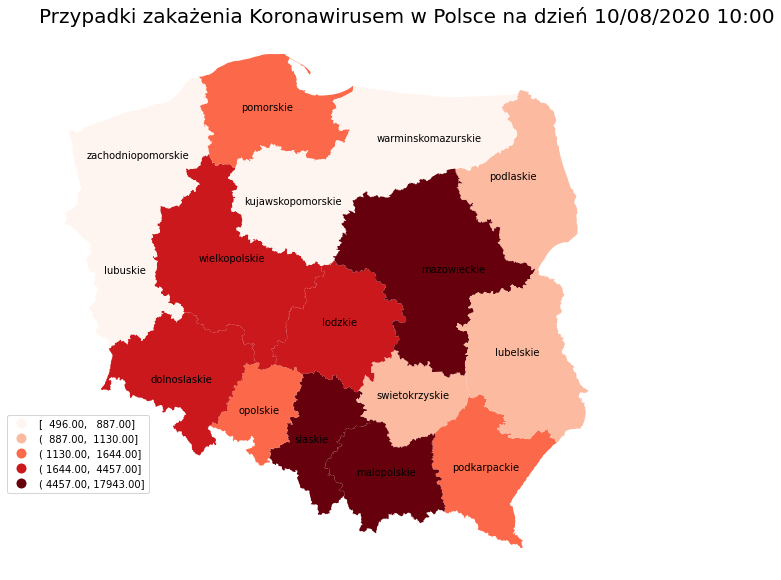

In [23]:
wojewodztwa['zarazenia'] = wojewodztwa['zarazenia'].astype(float)
wojewodztwa['coords'] = wojewodztwa['geometry'].apply(lambda x: x.representative_point().coords[:])
wojewodztwa['coords'] = [coords[0] for coords in wojewodztwa['coords']]
fig, ax = plt.subplots(figsize=(12,10))
'''wojewodztwa.assign(zarazenia=hr60_q10.yb).plot(column='zarazenia', categorical=True,cmap='OrRd', linewidth=0.1, ax=ax, \
                              edgecolor='white', legend=True)'''
wojewodztwa.plot(ax=ax, column='zarazenia', cmap='Reds', legend=True, scheme='quantiles', k=5)
for idx, row in wojewodztwa.iterrows():
    plt.annotate(s=row['wojewodztwa'], xy=row['coords'],
                 horizontalalignment='center')
ax.set_title('Przypadki zakażenia Koronawirusem w Polsce na dzień'+' '+str(data), fontdict={'fontsize': 20}, loc='left')
ax.get_legend().set_bbox_to_anchor((.2, .3))
ax.set_axis_off()

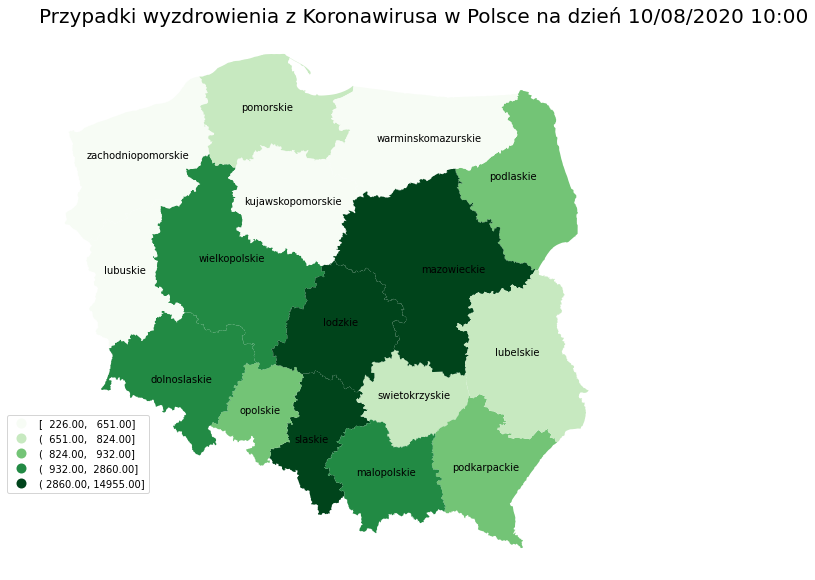

In [24]:
wojewodztwa['wyzdrowienia'] = wojewodztwa['wyzdrowienia'].astype(float)
wojewodztwa['coords'] = wojewodztwa['geometry'].apply(lambda x: x.representative_point().coords[:])
wojewodztwa['coords'] = [coords[0] for coords in wojewodztwa['coords']]
fig, ax = plt.subplots(figsize=(12,10))
wojewodztwa.plot(ax=ax, column='wyzdrowienia', cmap='Greens', legend=True, scheme='quantiles', k=5)
for idx, row in wojewodztwa.iterrows():
    plt.annotate(s=row['wojewodztwa'], xy=row['coords'],
                 horizontalalignment='center')
ax.set_title('Przypadki wyzdrowienia z Koronawirusa w Polsce na dzień'+' '+str(data), fontdict={'fontsize': 20}, loc='left')
ax.get_legend().set_bbox_to_anchor((.2, .3))
ax.set_axis_off()

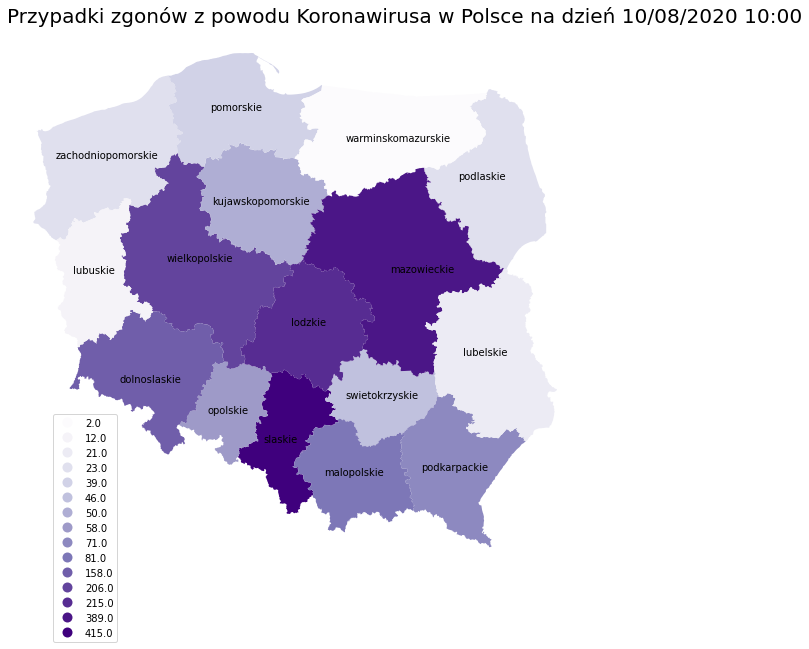

In [25]:
wojewodztwa['zgony'] = wojewodztwa['zgony'].astype(float)
wojewodztwa['coords'] = wojewodztwa['geometry'].apply(lambda x: x.representative_point().coords[:])
wojewodztwa['coords'] = [coords[0] for coords in wojewodztwa['coords']]
fig, ax = plt.subplots(figsize=(12,10))
wojewodztwa.plot(ax=ax, column='zgony', cmap='Purples',categorical=True, legend=True)
for idx, row in wojewodztwa.iterrows():
    plt.annotate(s=row['wojewodztwa'], xy=row['coords'],
                 horizontalalignment='center')
ax.set_title('Przypadki zgonów z powodu Koronawirusa w Polsce na dzień'+' '+str(data), fontdict={'fontsize': 20}, loc='left')
ax.get_legend().set_bbox_to_anchor((.2, .3))
ax.set_axis_off()

Suma wszystkich przypadków w Polsce

In [26]:
przy_zaraz=df["zarazenia"].astype(int).sum()
przy_zaraz

52410

In [27]:
przyp_wyzdro=df["wyzdrowienia"].astype(int).sum()
przyp_wyzdro

36527

In [28]:
przyp_zgon=df["zgony"].astype(int).sum()
przyp_zgon

1809

In [29]:
#konwersja kolumn ze string'a na numeryczne w celu pozniejszego ich posortowania
cols=['zarazenia','wyzdrowienia','zgony']
a=df[cols].apply(pd.to_numeric)
a['wojewodztwa']=nazwy_woj
a

,zarazenia,wyzdrowienia,zgony,wojewodztwa
0,3501,2614,158,dolnoslaskie
1,887,651,50,kujawskopomorskie
2,1130,789,21,lubelskie
3,550,226,12,lubuskie
4,4300,3403,215,lodzkie
5,4693,1843,81,malopolskie
6,7247,4138,389,mazowieckie
7,1323,932,58,opolskie
8,1644,865,71,podkarpackie
9,1071,871,23,podlaskie


Wizualizacja danych na wykresach

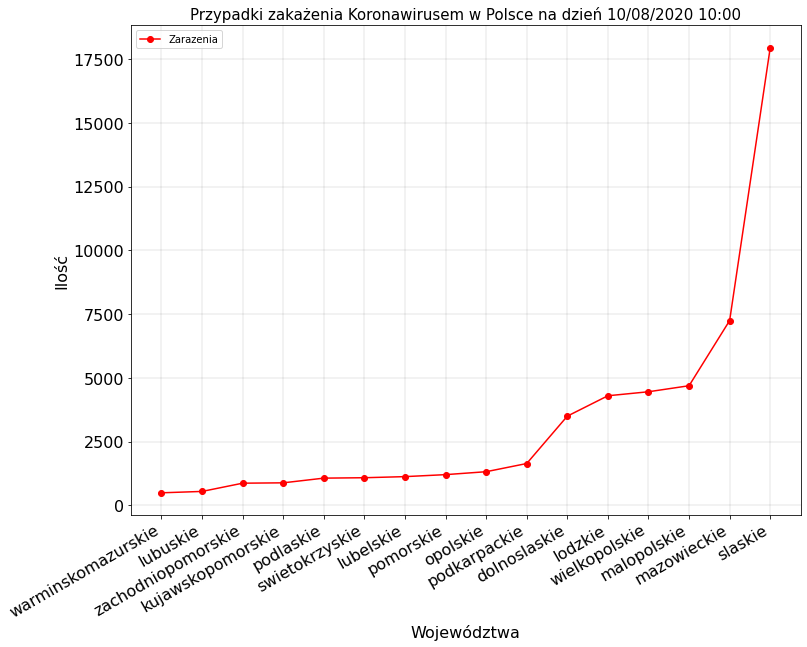

In [30]:
c=a[['wojewodztwa','zarazenia']].sort_values(by=['zarazenia'], ascending=True)
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(c['wojewodztwa'],c['zarazenia'],color='red', marker='o',label="Zarazenia")
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
ax.set_title('Przypadki zakażenia Koronawirusem w Polsce na dzień'+' '+str(data),fontsize=15)
plt.xlabel('Województwa',fontsize=16)
plt.ylabel('Ilość',fontsize=16)
plt.legend()
fig.autofmt_xdate()

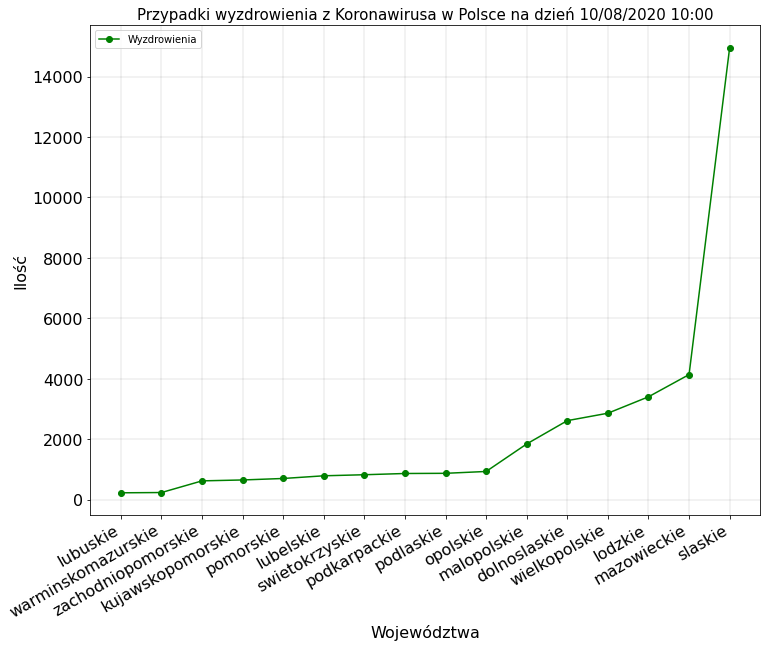

In [31]:
c=a[['wojewodztwa','wyzdrowienia']].sort_values(by=['wyzdrowienia'], ascending=True)
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(c['wojewodztwa'],c['wyzdrowienia'],color='green', marker='o',label='Wyzdrowienia')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
ax.set_title('Przypadki wyzdrowienia z Koronawirusa w Polsce na dzień'+' '+str(data),fontsize=15)
plt.xlabel('Województwa',fontsize=16)
plt.ylabel('Ilość',fontsize=16)
plt.legend()
fig.autofmt_xdate()

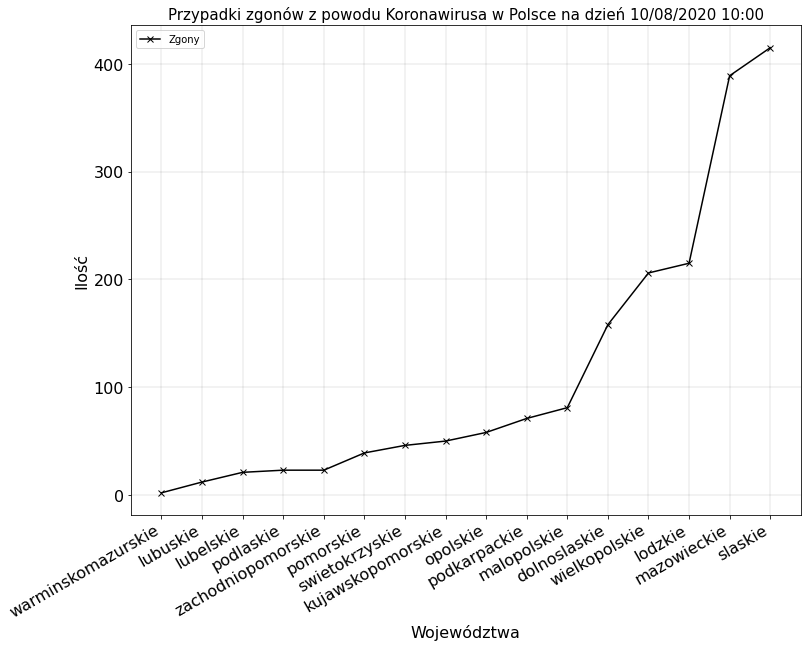

In [32]:
c=a[['wojewodztwa','zgony']].sort_values(by=['zgony'], ascending=True)
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(c['wojewodztwa'],c['zgony'], color='black',marker='x',label='Zgony')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
ax.set_title('Przypadki zgonów z powodu Koronawirusa w Polsce na dzień'+' '+str(data),fontsize=15)
plt.xlabel('Województwa',fontsize=16)
plt.ylabel('Ilość',fontsize=16)
plt.legend()
fig.autofmt_xdate()